In [129]:
import pickle
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [412]:
data = pickle.load( open( "../Data/data.pickle", "rb" ) )

FileNotFoundError: [Errno 2] No such file or directory: '../Data/data.pickle'

In [9]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

data.columns = ['country_name', 'avg_primary_school_completion',
       'avg_female_child_emp',
       'avg_male_child_emp', 'avg_gdp_on_ed',
       'avg_pop_density', 'avg_urban_pop', 'agricultural_land',
       'gini_index', 'ed_to_military_ratio', 'adolescent_birth_rate',
       'improved_sanitation_total', 'immunization_avg', 'father_support',
       'region', 'income_gp', 'high_income', 'low_income',
       'lower_middle_income', 'upper_middle_income', 'eap',
       'eca', 'lac',
       'mena', 'na', 'sa',
       'ssa', 'relative_country_income']

In [10]:
data

,country_name,avg_primary_school_completion,avg_female_child_emp,avg_male_child_emp,avg_gdp_on_ed,avg_pop_density,avg_urban_pop,agricultural_land,gini_index,ed_to_military_ratio,adolescent_birth_rate,improved_sanitation_total,immunization_avg,father_support,region,income_gp,high_income,low_income,lower_middle_income,upper_middle_income,eap,eca,lac,mena,na,sa,ssa,relative_country_income
1,Angola,41.000475,30.100000,30.000000,NaN,18.382628,58.639895,46.671448,47.350000,0.827895,190.90,52.0,73.000,NaN,Sub-Saharan Africa,Lower middle income,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,Albania,97.193730,18.414440,24.173033,29.845680,107.789280,51.027526,42.261679,30.325000,NaN,17.60,93.0,86.000,52.80,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,NaN,NaN,34.20,98.0,89.250,NaN,Middle East & North Africa,High income,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,Argentina,101.405976,6.643352,11.047324,13.124827,14.823043,90.614737,51.637240,45.770588,6.862963,69.60,96.0,82.000,56.70,Latin America & Caribbean,Upper middle income,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
5,Armenia,95.185489,7.500000,12.000000,10.983123,103.612610,63.624895,56.680303,32.023529,0.562925,22.70,89.0,82.375,NaN,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
6,Antigua and Barbuda,88.527339,NaN,NaN,8.693380,196.539474,27.498158,20.454545,NaN,NaN,66.80,NaN,73.750,NaN,Latin America & Caribbean,High income,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
7,Austria,98.512104,NaN,NaN,22.971336,101.440646,58.318316,34.010416,30.269231,7.069770,8.43,100.0,70.250,NaN,Europe & Central Asia,High income,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
8,Azerbaijan,95.473141,5.915139,8.907135,NaN,108.079907,53.322947,57.590232,28.360000,0.521535,47.20,89.0,79.625,NaN,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
9,Burundi,48.716837,26.359093,27.393380,12.436066,331.864000,10.473632,73.220176,36.000000,2.415133,65.00,48.0,95.375,19.60,Sub-Saharan Africa,Low income,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10,Benin,62.947807,49.900000,48.600000,10.900368,80.092427,42.633211,31.049287,43.266667,5.310205,98.00,20.0,62.375,5.20,Sub-Saharan Africa,Low income,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [71]:
# here's a model with all of our complete data just thrown in there
model1 = sm.OLS(endog=data['avg_primary_school_completion'], exog= data[['avg_pop_density', 'avg_urban_pop',
                                                                'agricultural_land', 'adolescent_birth_rate',
                                                                'improved_sanitation_total',
                                                                'immunization_avg', 'relative_country_income']]
                   , missing='drop').fit()


In [72]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.977
Model:                                       OLS   Adj. R-squared:                  0.976
Method:                            Least Squares   F-statistic:                     942.9
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):          2.28e-125
Time:                                   11:38:17   Log-Likelihood:                -666.04
No. Observations:                            165   AIC:                             1346.
Df Residuals:                                158   BIC:                             1368.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
avg_pop_density               0.0018      0.002      0.909      0.365      -0.002       0.006
avg_urban_pop                -0.0027      0.068     -0.040      0.968      -0.137       0.132
agricultural_land             0.0866      0.051      1.697      0.092      -0.014       0.187
adolescent_birth_rate         0.0598      0.028      2.152      0.033       0.005       0.115
improved_sanitation_total     0.5364      0.064      8.361      0.000       0.410       0.663
immunization_avg              0.4816      0.067      7.219      0.000       0.350       0.613
relative_country_income       2.8351      2.001      1.417      0.158      -1.116       6.787
==============================================================================
Omnibus:                        6.941   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.031   Jarque-Bera (JB):               10.086
Skew:                           0.197   Prob(JB):                      0.00645
Kurtosis:                       4.145   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Okay, so our most basic model has a strong $r^2$, but there are some variables in there that aren't adding much - the urban population of a country seem to have pretty much no relationship, but avg population density, agricultural land, and relative country income might have a relationship that we need to tease out using interaction variables. However, adolescent birth rate, improved santiation, and immunization average seem like they definitely have an impact. We might want to look at the residual plot and see what's going on.

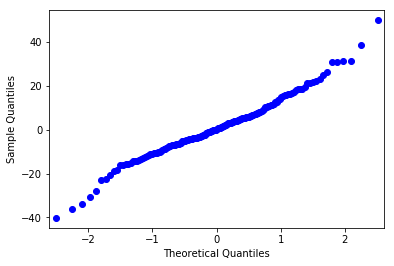

In [73]:
res = model1.resid # residuals
fig = sm.qqplot(res)
plt.show()

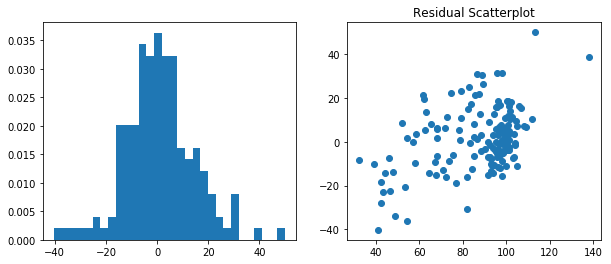

In [75]:
checkresiduals(data[features[:-1]+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model1)


Now maybe we should look to see pair plots to determine possible interaction terms. 

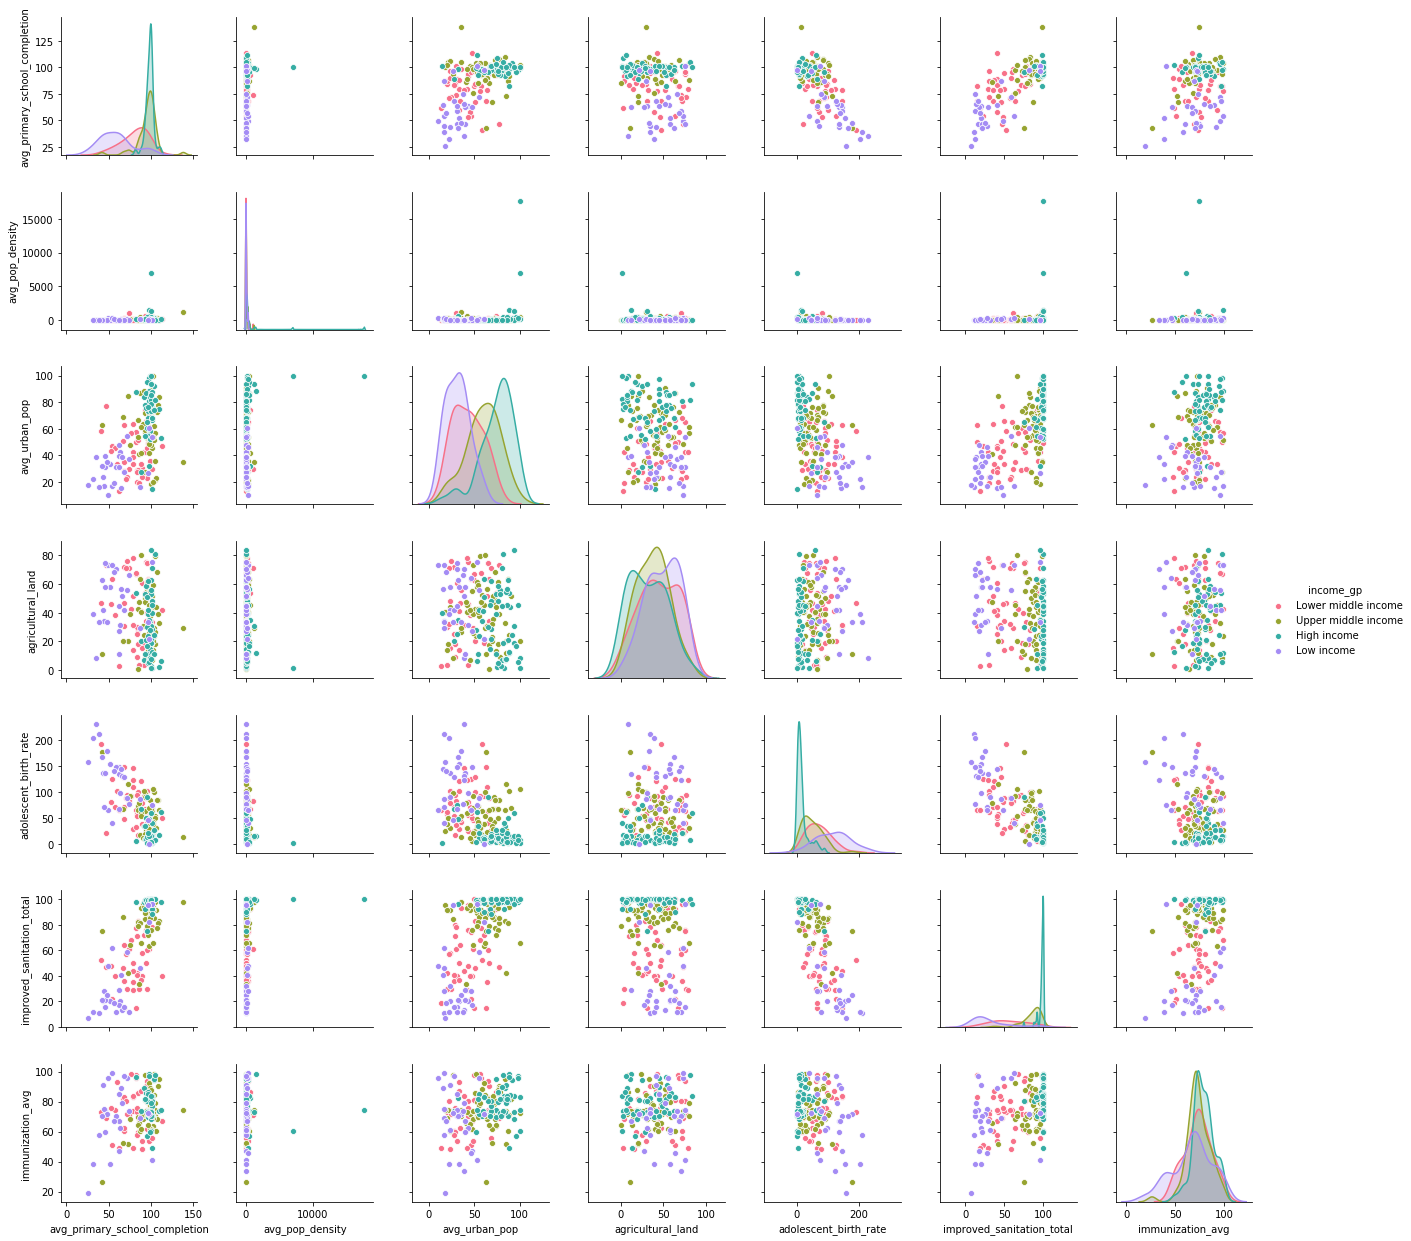

In [163]:
sns.pairplot(vars= ['avg_primary_school_completion','avg_pop_density', 'avg_urban_pop',
                    'agricultural_land', 'adolescent_birth_rate','improved_sanitation_total',
                    'immunization_avg'],
             data=data, hue="income_gp", palette="husl")

The avg pop_density column of graphs shows us that our density is really clustering around 0. Maybe there's more to this? Seems like we should inspect the data there for outliers and think about removing them. 

In [78]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'relative_country_income', 'ssa*avg_urban_pop']

model2= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()

In [79]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.679
Model:                                       OLS   Adj. R-squared:                  0.660
Method:                            Least Squares   F-statistic:                     36.43
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.80e-34
Time:                                   11:40:27   Log-Likelihood:                -619.19
No. Observations:                            165   AIC:                             1258.
Df Residuals:                                155   BIC:                             1289.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    70.9587      6.859     10.346      0.000      57.410      84.507
avg_pop_density               0.0010      0.001      0.691      0.490      -0.002       0.004
avg_urban_pop                -0.0938      0.055     -1.698      0.091      -0.203       0.015
agricultural_land             0.0167      0.042      0.401      0.689      -0.066       0.099
adolescent_birth_rate        -0.0804      0.029     -2.732      0.007      -0.139      -0.022
improved_sanitation_total     0.1813      0.062      2.932      0.004       0.059       0.303
immunization_avg              0.1574      0.066      2.369      0.019       0.026       0.289
relative_country_income       2.5217      1.537      1.641      0.103      -0.515       5.558
ssa                         -27.2803      5.950     -4.585      0.000     -39.034     -15.527
ssa:avg_urban_pop             0.3665      0.113      3.232      0.002       0.142       0.590
==============================================================================
Omnibus:                       12.264   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               33.032
Skew:                          -0.035   Prob(JB):                     6.72e-08
Kurtosis:                       5.191   Cond. No.                     5.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

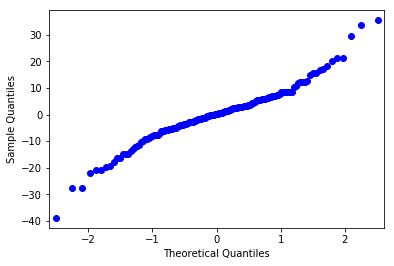

In [80]:
res = model2.resid # residuals
fig = sm.qqplot(res)
plt.show()

In [81]:
# data that's being used in the model
data[features[:-1]+['avg_primary_school_completion']].dropna()

,avg_pop_density,avg_urban_pop,agricultural_land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,relative_country_income,avg_primary_school_completion
1,18.382628,58.639895,46.671448,190.90,52.0,73.000,1,41.000475
2,107.789280,51.027526,42.261679,17.60,93.0,86.000,2,97.193730
3,97.491177,83.603789,6.716998,34.20,98.0,89.250,3,91.408940
4,14.823043,90.614737,51.637240,69.60,96.0,82.000,2,101.405976
5,103.612610,63.624895,56.680303,22.70,89.0,82.375,2,95.185489
7,101.440646,58.318316,34.010416,8.43,100.0,70.250,3,98.512104
8,108.079907,53.322947,57.590232,47.20,89.0,79.625,2,95.473141
9,331.864000,10.473632,73.220176,65.00,48.0,95.375,0,48.716837
10,80.092427,42.633211,31.049287,98.00,20.0,62.375,0,62.947807
11,56.071821,23.869526,41.724716,136.00,20.0,91.125,0,43.312480


In [396]:
# sean's residual checker
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    
    ax1.set_title('Residual Distribution')
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel('Residuals')
    
    ax2.set_title('Residual Scatterplot')
    ax2.set_xlabel('Actual Primary School Completion Rate')
    ax2.set_ylabel('Residual')
    plt.show()

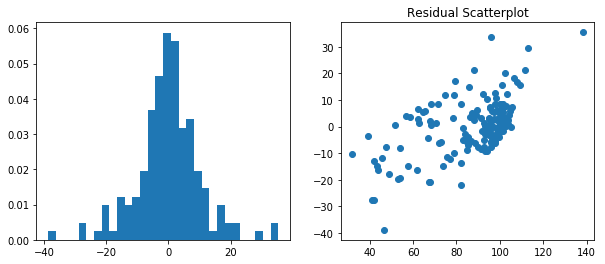

In [83]:
checkresiduals(data[features[:-1]+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model2)


In [95]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'relative_country_income', 'region',
           'ssa*avg_urban_pop']

model3= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()

In [96]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.705
Model:                                       OLS   Adj. R-squared:                  0.677
Method:                            Least Squares   F-statistic:                     25.55
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           7.89e-33
Time:                                   11:46:16   Log-Likelihood:                -612.34
No. Observations:                            165   AIC:                             1255.
Df Residuals:                                150   BIC:                             1301.
Df Model:                                     14                                         
Covariance Type:                       nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               71.3774      7.520      9.492      0.000      56.519      86.235
region[T.Europe & Central Asia]         -8.2162      3.168     -2.594      0.010     -14.476      -1.957
region[T.Latin America & Caribbean]     -2.6922      3.582     -0.752      0.453      -9.770       4.386
region[T.Middle East & North Africa]   -11.5602      3.674     -3.146      0.002     -18.820      -4.300
region[T.North America]                -11.1264     10.883     -1.022      0.308     -32.631      10.378
region[T.South Asia]                    -2.6959      4.646     -0.580      0.563     -11.877       6.485
region[T.Sub-Saharan Africa]           -12.4946      3.161     -3.953      0.000     -18.740      -6.249
avg_pop_density                         -0.0002      0.002     -0.145      0.885      -0.003       0.003
avg_urban_pop                           -0.0185      0.062     -0.299      0.765      -0.141       0.104
agricultural_land                        0.0305      0.043      0.715      0.476      -0.054       0.115
adolescent_birth_rate                   -0.1072      0.035     -3.085      0.002      -0.176      -0.039
improved_sanitation_total                0.2245      0.063      3.554      0.001       0.100       0.349
immunization_avg                         0.1420      0.070      2.041      0.043       0.005       0.280
relative_country_income                  1.8795      1.576      1.192      0.235      -1.235       4.994
ssa                                    -12.4946      3.161     -3.953      0.000     -18.740      -6.249
ssa:avg_urban_pop                        0.2857      0.116      2.474      0.014       0.057       0.514
==============================================================================
Omnibus:                       11.702   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               30.208
Skew:                          -0.036   Prob(JB):                     2.76e-07
Kurtosis:                       5.095   Cond. No.                     1.42e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

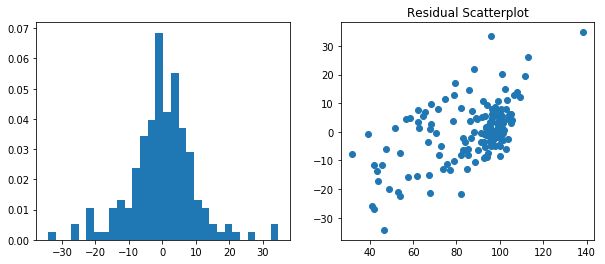

In [97]:
checkresiduals(data[features[:-1]+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model3)


In [98]:
# takes regions with significant p values and creates a feature from that
data['sig_regions'] = data.apply(lambda x: 1 if x.ssa==1 or x.eca==1 or x.mena==1 else 0, axis=1)

In [102]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'relative_country_income', 
           'sig_regions', 'ssa*avg_urban_pop']

model4= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()

In [103]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.699
Model:                                       OLS   Adj. R-squared:                  0.680
Method:                            Least Squares   F-statistic:                     35.80
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           2.73e-35
Time:                                   11:47:39   Log-Likelihood:                -613.83
No. Observations:                            165   AIC:                             1250.
Df Residuals:                                154   BIC:                             1284.
Df Model:                                     10                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    72.8110      6.686     10.890      0.000      59.603      86.019
avg_pop_density              -0.0001      0.001     -0.082      0.935      -0.003       0.003
avg_urban_pop                -0.0397      0.056     -0.707      0.480      -0.151       0.071
agricultural_land             0.0366      0.041      0.894      0.373      -0.044       0.117
adolescent_birth_rate        -0.1150      0.031     -3.765      0.000      -0.175      -0.055
improved_sanitation_total     0.2150      0.061      3.526      0.001       0.095       0.335
immunization_avg              0.1212      0.065      1.850      0.066      -0.008       0.251
relative_country_income       2.1536      1.497      1.439      0.152      -0.804       5.111
sig_regions                  -7.4829      2.328     -3.214      0.002     -12.082      -2.884
ssa                         -16.4529      6.689     -2.460      0.015     -29.667      -3.239
ssa:avg_urban_pop             0.3010      0.112      2.687      0.008       0.080       0.522
==============================================================================
Omnibus:                       12.100   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               30.320
Skew:                          -0.131   Prob(JB):                     2.61e-07
Kurtosis:                       5.084   Cond. No.                     5.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

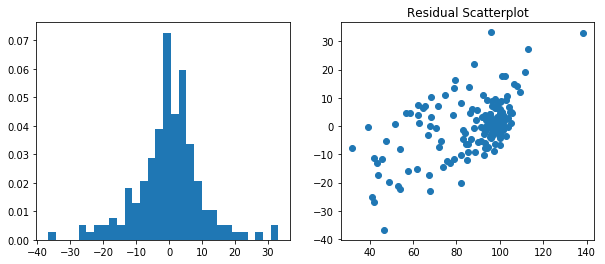

In [105]:
checkresiduals(data[features[:-1]+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model4)


In [114]:
data[features[:-1]+['avg_primary_school_completion', 'country_name', 'region', 'income_gp']].dropna().sort_values('avg_primary_school_completion')

,avg_pop_density,avg_urban_pop,agricultural_land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,relative_country_income,sig_regions,avg_primary_school_completion,country_name,region,income_gp
160,9.296887,22.092632,39.245366,203.40,12.0,38.250,0,1,31.961525,Chad,Sub-Saharan Africa,Low income
119,12.820258,16.250263,33.582305,210.00,11.0,58.000,0,1,39.204390,Niger,Sub-Saharan Africa,Low income
1,18.382628,58.639895,46.671448,190.90,52.0,73.000,1,1,41.000475,Angola,Sub-Saharan Africa,Lower middle income
64,32.898199,62.937316,10.890217,177.00,75.0,26.375,2,1,42.075974,Equatorial Guinea,Sub-Saharan Africa,Upper middle income
113,29.435601,31.842684,62.806037,166.00,21.0,70.375,0,1,42.158185,Mozambique,Sub-Saharan Africa,Low income
11,56.071821,23.869526,41.724716,136.00,20.0,91.125,0,1,43.312480,Burkina Faso,Sub-Saharan Africa,Low income
53,86.244572,17.257263,34.258271,71.20,28.0,75.125,0,1,44.042136,Ethiopia,Sub-Saharan Africa,Low income
63,53.526101,39.748316,57.599782,136.70,21.0,59.875,0,1,45.846244,Guinea-Bissau,Sub-Saharan Africa,Low income
43,35.980094,77.025842,73.097752,20.60,47.0,69.250,1,1,46.432842,Djibouti,Middle East & North Africa,Lower middle income
108,12.053079,35.257053,33.277527,178.00,25.0,71.500,0,1,47.629821,Mali,Sub-Saharan Africa,Low income


In [122]:
res = model4.resid
hi = data[features[:-1]+['avg_primary_school_completion', 'country_name', 'region', 'income_gp']].dropna()

temp = hi.copy()
temp['residual']=res
temp

,avg_pop_density,avg_urban_pop,agricultural_land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,relative_country_income,sig_regions,avg_primary_school_completion,country_name,region,income_gp,residual
1,18.382628,58.639895,46.671448,190.90,52.0,73.000,1,1,41.000475,Angola,Sub-Saharan Africa,Lower middle income,-25.118862
2,107.789280,51.027526,42.261679,17.60,93.0,86.000,2,1,97.193730,Albania,Europe & Central Asia,Upper middle income,-0.336282
3,97.491177,83.603789,6.716998,34.20,98.0,89.250,3,1,91.408940,United Arab Emirates,Middle East & North Africa,High income,-5.240310
4,14.823043,90.614737,51.637240,69.60,96.0,82.000,2,0,101.405976,Argentina,Latin America & Caribbean,Upper middle income,3.433423
5,103.612610,63.624895,56.680303,22.70,89.0,82.375,2,1,95.185489,Armenia,Europe & Central Asia,Upper middle income,-0.485878
7,101.440646,58.318316,34.010416,8.43,100.0,70.250,3,1,98.512104,Austria,Europe & Central Asia,High income,-1.231397
8,108.079907,53.322947,57.590232,47.20,89.0,79.625,2,1,95.473141,Azerbaijan,Europe & Central Asia,Upper middle income,2.510917
9,331.864000,10.473632,73.220176,65.00,48.0,95.375,0,1,48.716837,Burundi,Sub-Saharan Africa,Low income,-19.932705
10,80.092427,42.633211,31.049287,98.00,20.0,62.375,0,1,62.947807,Benin,Sub-Saharan Africa,Low income,1.223347
11,56.071821,23.869526,41.724716,136.00,20.0,91.125,0,1,43.312480,Burkina Faso,Sub-Saharan Africa,Low income,-13.017438


In [126]:
temp[temp['residual'].abs()>20].sort_values('residual')

,avg_pop_density,avg_urban_pop,agricultural_land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,relative_country_income,sig_regions,avg_primary_school_completion,country_name,region,income_gp,residual
43,35.980094,77.025842,73.097752,20.6,47.0,69.250,1,1,46.432842,Djibouti,Middle East & North Africa,Lower middle income,-36.783308
64,32.898199,62.937316,10.890217,177.0,75.0,26.375,2,1,42.075974,Equatorial Guinea,Sub-Saharan Africa,Upper middle income,-26.901247
1,18.382628,58.639895,46.671448,190.9,52.0,73.000,1,1,41.000475,Angola,Sub-Saharan Africa,Lower middle income,-25.118862
126,228.496312,34.802421,46.925973,48.0,64.0,62.625,1,0,67.984037,Pakistan,South Asia,Lower middle income,-23.112193
141,401.921117,16.793368,72.935477,41.0,62.0,98.750,0,1,54.174697,Rwanda,Sub-Saharan Africa,Low income,-22.285804
144,65.030238,43.441211,46.221979,80.0,48.0,75.875,1,1,53.256195,Senegal,Sub-Saharan Africa,Lower middle income,-21.115427
98,209.000498,87.988368,53.451707,6.4,98.0,96.625,3,1,81.960036,Luxembourg,Europe & Central Asia,High income,-20.302149
184,33.104282,33.333316,41.415961,120.0,37.0,86.750,1,1,88.040190,Zimbabwe,Sub-Saharan Africa,Lower middle income,22.128390
87,123.751462,47.287474,41.975309,49.0,40.0,66.875,1,0,113.057680,Kiribati,East Asia & Pacific,Lower middle income,27.385039
104,1243.781053,35.196632,29.470588,13.9,98.0,74.250,2,0,138.221984,Maldives,South Asia,Upper middle income,33.110931


In [164]:
data.groupby(['income_gp']).count()

,country_name,avg_primary_school_completion,avg_female_child_emp,avg_male_child_emp,avg_gdp_on_ed,avg_pop_density,avg_urban_pop,agricultural_land,gini_index,ed_to_military_ratio,adolescent_birth_rate,improved_sanitation_total,immunization_avg,father_support,region,high_income,low_income,lower_middle_income,upper_middle_income,eap,eca,lac,mena,na,sa,ssa,relative_country_income,sig_regions
income_gp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High income,58,48,5,5,53,58,58,57,39,41,57,52,57,6,58,58,58,58,58,58,58,58,58,58,58,58,58,58
Low income,31,28,29,29,26,30,31,30,27,22,30,28,30,19,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Lower middle income,47,46,34,34,38,46,47,46,46,29,47,46,47,26,47,47,47,47,47,47,47,47,47,47,47,47,47,47
Upper middle income,58,55,29,29,43,58,58,58,46,32,58,54,58,24,58,58,58,58,58,58,58,58,58,58,58,58,58,58


In [173]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'low_income*avg_urban_pop']

model5= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()

In [174]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.679
Model:                                       OLS   Adj. R-squared:                  0.662
Method:                            Least Squares   F-statistic:                     41.20
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           9.27e-35
Time:                                   14:00:03   Log-Likelihood:                -619.25
No. Observations:                            165   AIC:                             1257.
Df Residuals:                                156   BIC:                             1284.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    68.6615      6.818     10.070      0.000      55.194      82.129
avg_pop_density               0.0008      0.001      0.523      0.602      -0.002       0.004
avg_urban_pop                -0.0666      0.048     -1.378      0.170      -0.162       0.029
agricultural_land            -0.0273      0.039     -0.694      0.489      -0.105       0.050
adolescent_birth_rate        -0.0978      0.027     -3.571      0.000      -0.152      -0.044
improved_sanitation_total     0.2829      0.051      5.508      0.000       0.181       0.384
immunization_avg              0.1421      0.066      2.156      0.033       0.012       0.272
low_income                  -29.5087      6.444     -4.579      0.000     -42.238     -16.779
low_income:avg_urban_pop      0.5516      0.170      3.247      0.001       0.216       0.887
==============================================================================
Omnibus:                       11.706   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               27.734
Skew:                          -0.154   Prob(JB):                     9.50e-07
Kurtosis:                       4.985   Cond. No.                     5.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

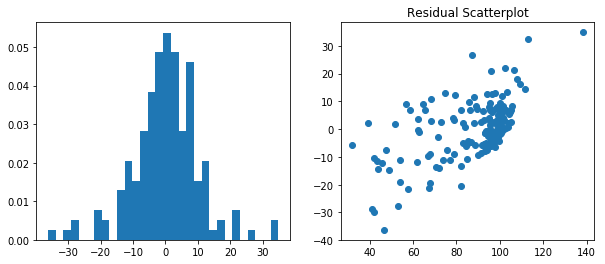

In [175]:
checkresiduals(data[features[:-1]+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model5)


In [176]:
features= ['avg_urban_pop', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'low_income*avg_urban_pop']

model6= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()

In [177]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.697
Model:                                       OLS   Adj. R-squared:                  0.685
Method:                            Least Squares   F-statistic:                     60.85
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           1.06e-38
Time:                                   14:00:14   Log-Likelihood:                -623.36
No. Observations:                            166   AIC:                             1261.
Df Residuals:                                159   BIC:                             1283.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    66.4703      6.356     10.458      0.000      53.917      79.024
avg_urban_pop                -0.0658      0.048     -1.383      0.169      -0.160       0.028
adolescent_birth_rate        -0.0974      0.027     -3.609      0.000      -0.151      -0.044
improved_sanitation_total     0.2897      0.050      5.737      0.000       0.190       0.389
immunization_avg              0.1516      0.062      2.453      0.015       0.030       0.274
low_income                  -30.8737      6.159     -5.013      0.000     -43.037     -18.710
low_income:avg_urban_pop      0.5832      0.164      3.564      0.000       0.260       0.906
==============================================================================
Omnibus:                       12.376   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               31.790
Skew:                          -0.124   Prob(JB):                     1.25e-07
Kurtosis:                       5.129   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

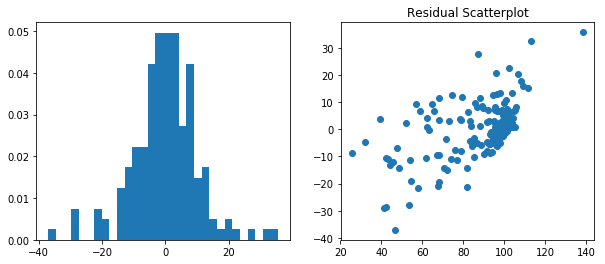

In [178]:
checkresiduals(data[features[:-1]+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model6)


In [182]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'low_income*avg_urban_pop', 
           'agricultural_land*immunization_avg']

model7= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.689
Model:                                       OLS   Adj. R-squared:                  0.670
Method:                            Least Squares   F-statistic:                     38.07
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.92e-35
Time:                                   14:07:06   Log-Likelihood:                -616.71
No. Observations:                            165   AIC:                             1253.
Df Residuals:                                155   BIC:                             1284.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             52.6857      9.895      5.325      0.000      33.139      72.232
avg_pop_density                        0.0010      0.001      0.693      0.489      -0.002       0.004
avg_urban_pop                         -0.0698      0.048     -1.462      0.146      -0.164       0.025
agricultural_land                      0.3986      0.197      2.022      0.045       0.009       0.788
adolescent_birth_rate                 -0.0998      0.027     -3.686      0.000      -0.153      -0.046
improved_sanitation_total              0.2792      0.051      5.500      0.000       0.179       0.379
immunization_avg                       0.3671      0.121      3.032      0.003       0.128       0.606
low_income                           -27.8265      6.412     -4.340      0.000     -40.492     -15.161
low_income:avg_urban_pop               0.4969      0.170      2.929      0.004       0.162       0.832
agricultural_land:immunization_avg    -0.0058      0.003     -2.204      0.029      -0.011      -0.001
==============================================================================
Omnibus:                       10.640   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.484
Skew:                          -0.098   Prob(JB):                     4.82e-06
Kurtosis:                       4.877   Cond. No.                     4.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

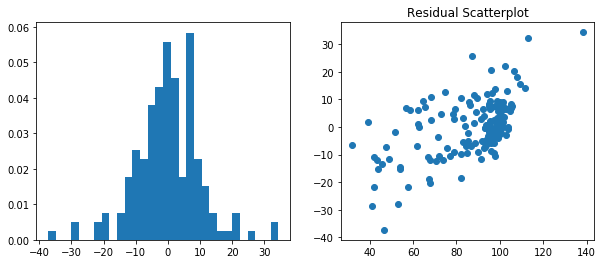

In [184]:
checkresiduals(data[features[:-2]+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model7)


In [375]:
# standardizing the data
features = ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg']
data2 = data.copy()
scalar = StandardScaler()
scalar.fit(data2[features])
scaled_features=scalar.transform(data2[features])
scaled_data = pd.DataFrame(scaled_features,columns=features,index=data2.index)
scaled_data['avg_primary_school_completion'] = data2['avg_primary_school_completion']
scaled_data['country_name'] = data2['country_name']
scaled_data['income_gp'] = data2['income_gp']
scaled_data = scaled_data.dropna()

In [213]:
# removing outliers if they're over 3 standard deviations or under 3 standard deviations
for feature in features:
    scaled_data[scaled_data[feature].abs()>3] = np.nan

scaled_data = scaled_data.dropna()

KeyError: 'low_income*avg_urban_pop'

In [376]:
# make dummies for income group
scaled_data = pd.concat([scaled_data,pd.get_dummies(scaled_data['income_gp'])], 1)

In [377]:
scaled_data.columns = ['avg_pop_density', 'avg_urban_pop', 'agricultural_land',
       'adolescent_birth_rate', 'improved_sanitation_total',
       'immunization_avg', 'avg_primary_school_completion', 'country_name',
       'income_gp', 'high_income', 'low_income', 'lower_middle_income',
       'upper_middle_income']

In [240]:
# same as model 7 but with no outliers now and standardized data
features= ['adolescent_birth_rate','improved_sanitation_total', 'low_income']

model8= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.631
Model:                                       OLS   Adj. R-squared:                  0.624
Method:                            Least Squares   F-statistic:                     89.33
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           9.00e-34
Time:                                   14:37:59   Log-Likelihood:                -605.05
No. Observations:                            161   AIC:                             1218.
Df Residuals:                                157   BIC:                             1230.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    89.8918      0.921     97.616      0.000      88.073      91.711
adolescent_birth_rate        -2.9971      1.409     -2.127      0.035      -5.780      -0.214
improved_sanitation_total     9.3312      1.371      6.805      0.000       6.623      12.040
low_income                  -10.8795      2.875     -3.785      0.000     -16.557      -5.202
==============================================================================
Omnibus:                       14.321   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               39.016
Skew:                          -0.209   Prob(JB):                     3.37e-09
Kurtosis:                       5.375   Cond. No.                         4.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

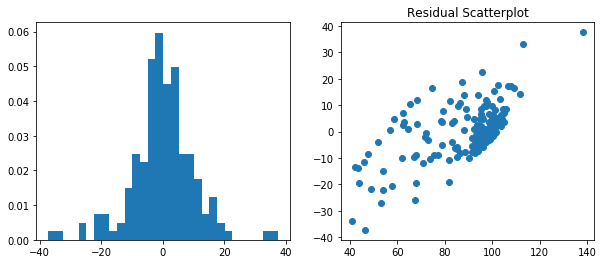

In [234]:
checkresiduals(scaled_data, 'avg_primary_school_completion', model8)

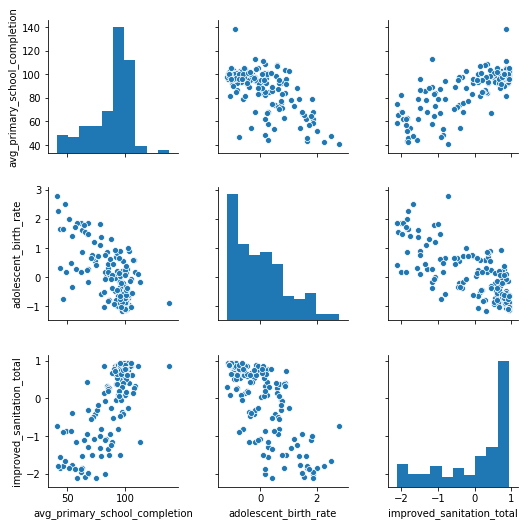

In [245]:
sns.pairplot(vars=['avg_primary_school_completion','adolescent_birth_rate',
                   'improved_sanitation_total'],data=scaled_data)

In [272]:
scaled_data['exp_improved_san'] = np.log(scaled_data['improved_sanitation_total']+3)

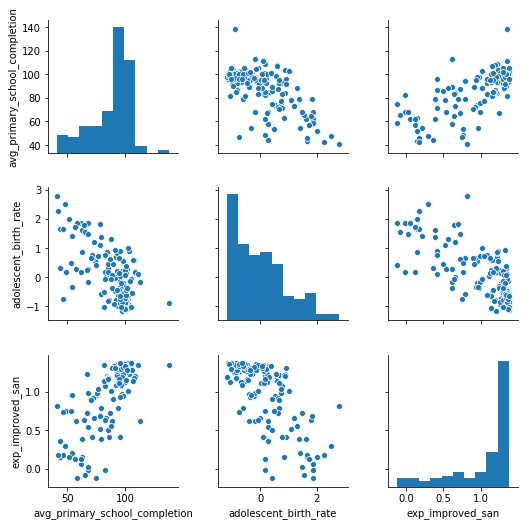

In [273]:
sns.pairplot(vars=['avg_primary_school_completion','adolescent_birth_rate',
                   'exp_improved_san'],data=scaled_data)

In [275]:
# logarithmic transformation of improved sanitation total
features= ['adolescent_birth_rate','exp_improved_san', 'low_income']

model9= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.614
Model:                                       OLS   Adj. R-squared:                  0.607
Method:                            Least Squares   F-statistic:                     83.33
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           2.66e-32
Time:                                   14:50:09   Log-Likelihood:                -608.54
No. Observations:                            161   AIC:                             1225.
Df Residuals:                                157   BIC:                             1237.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                69.3604      3.598     19.277      0.000      62.253      76.467
adolescent_birth_rate    -3.9516      1.392     -2.840      0.005      -6.700      -1.203
exp_improved_san         19.8762      3.237      6.139      0.000      13.482      26.271
low_income               -9.8221      3.018     -3.254      0.001     -15.784      -3.860
==============================================================================
Omnibus:                       19.465   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.745
Skew:                          -0.434   Prob(JB):                     9.57e-12
Kurtosis:                       5.610   Cond. No.                         8.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

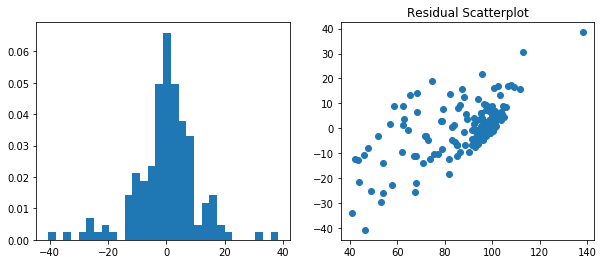

In [277]:
checkresiduals(scaled_data, 'avg_primary_school_completion', model9)

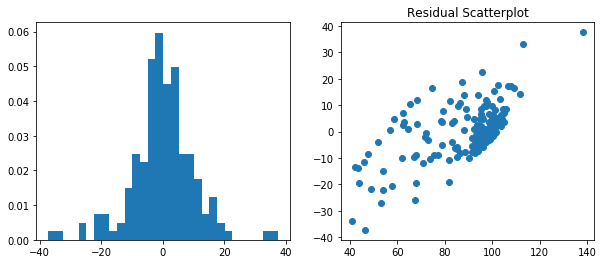

In [278]:
checkresiduals(scaled_data, 'avg_primary_school_completion', model8)

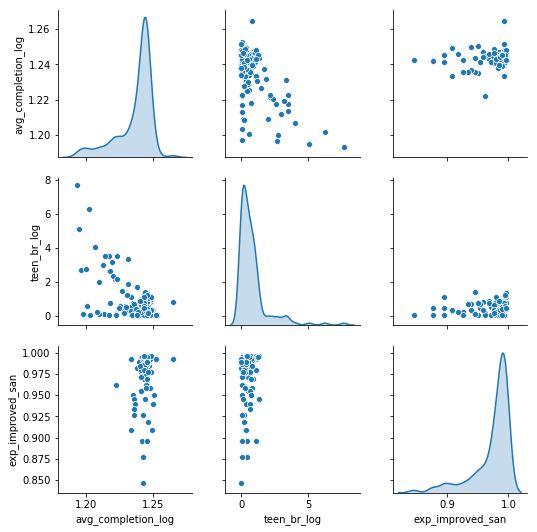

In [359]:
# log trans. of primary school compl.
scaled_data['avg_completion_log'] = scaled_data["avg_primary_school_completion"]
scaled_data['teen_br_log'] = scaled_data["adolescent_birth_rate"]
scaled_data['exp_improved_san'] = scaled_data['improved_sanitation_total']

# logarithmic transformation of improved sanitation total AND of dep. variable
features= ['adolescent_birth_rate','exp_improved_san', 'low_income']

model9= ols(formula="avg_completion_log~"+'+'.join(features), data=scaled_data).fit()
model9.summary()

sns.pairplot(vars=['avg_completion_log','teen_br_log',
                   'exp_improved_san'],data=scaled_data, diag_kind='kde')

In [366]:
scaled_data.drop(['exp_improved_san','avg_completion_log','teen_br_log'], axis=1, inplace=True)

In [370]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'low_income*avg_urban_pop', 
           'agricultural_land*immunization_avg']

model7= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.656
Model:                                       OLS   Adj. R-squared:                  0.635
Method:                            Least Squares   F-statistic:                     31.95
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           9.17e-31
Time:                                   16:01:56   Log-Likelihood:                -599.39
No. Observations:                            161   AIC:                             1219.
Df Residuals:                                151   BIC:                             1250.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             90.4865      1.032     87.720      0.000      88.448      92.525
avg_pop_density                        5.5944      5.129      1.091      0.277      -4.540      15.728
avg_urban_pop                         -1.2122      1.106     -1.096      0.275      -3.397       0.973
agricultural_land                     -0.8392      0.837     -1.003      0.317      -2.492       0.814
adolescent_birth_rate                 -3.2757      1.421     -2.306      0.022      -6.082      -0.469
improved_sanitation_total              8.9592      1.503      5.962      0.000       5.990      11.928
immunization_avg                       0.8844      0.981      0.902      0.369      -1.054       2.823
low_income                            -0.9428      4.761     -0.198      0.843     -10.350       8.465
low_income:avg_urban_pop              10.7727      4.089      2.635      0.009       2.695      18.851
agricultural_land:immunization_avg    -0.7755      0.851     -0.912      0.363      -2.456       0.905
==============================================================================
Omnibus:                       11.037   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               24.767
Skew:                          -0.162   Prob(JB):                     4.19e-06
Kurtosis:                       4.894   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

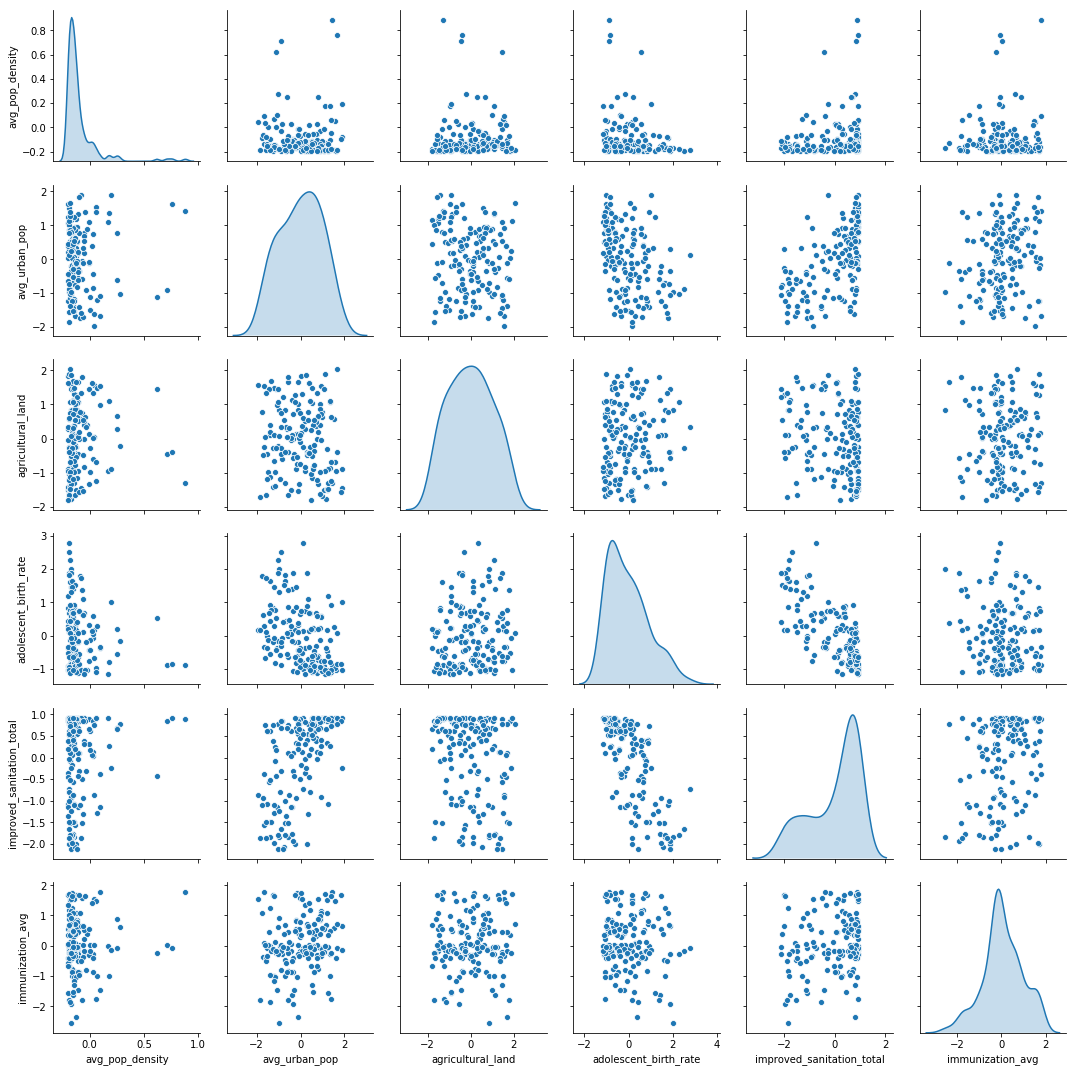

In [371]:
sns.pairplot(vars=['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg'],data=scaled_data, diag_kind='kde')

/Users/hannah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/hannah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


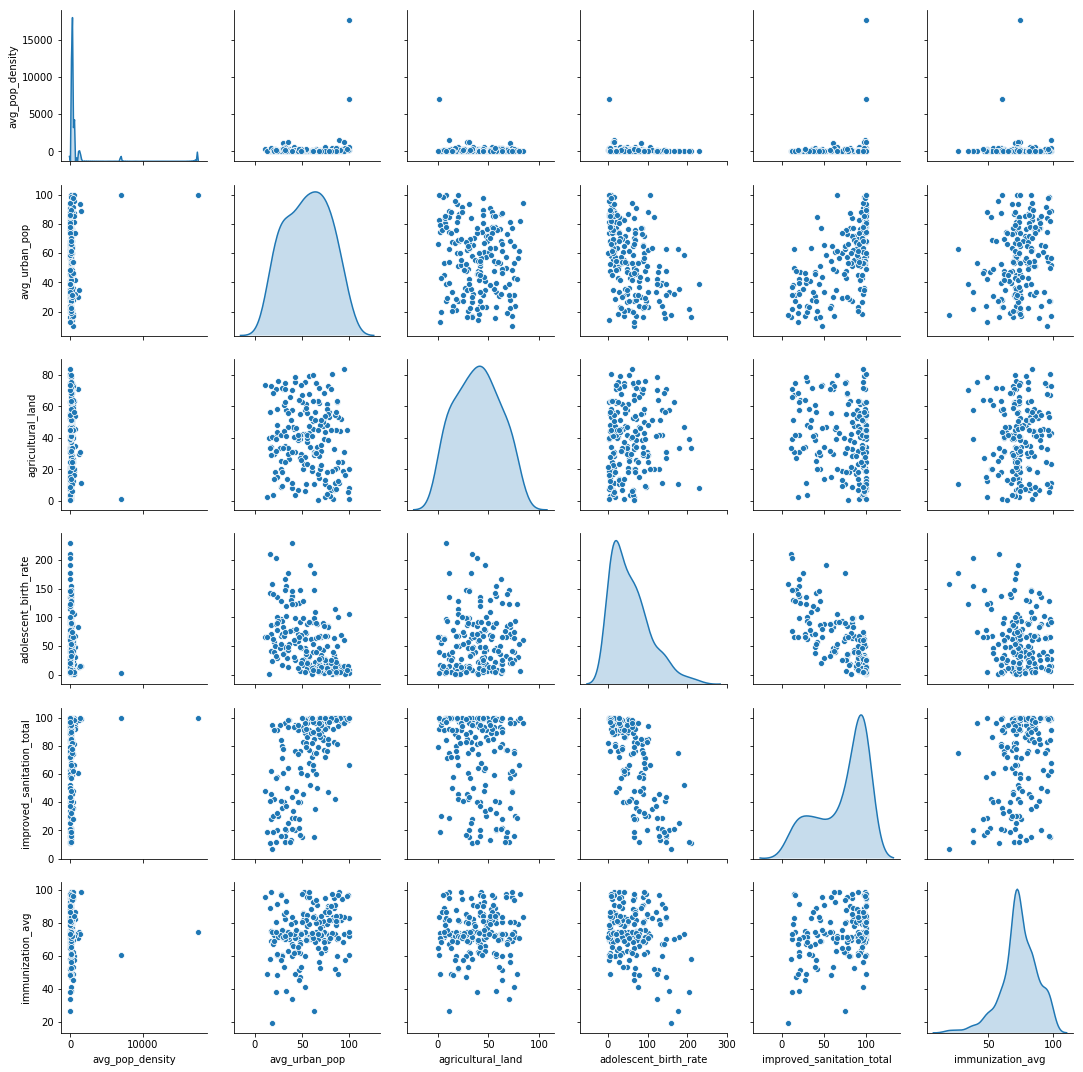

In [372]:
sns.pairplot(vars=['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg'],data=data, diag_kind='kde')

In [380]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg','low_income*avg_urban_pop', 
           'agricultural_land*immunization_avg']

model_wo_interact= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
model_wo_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.689
Model:                                       OLS   Adj. R-squared:                  0.670
Method:                            Least Squares   F-statistic:                     38.07
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.92e-35
Time:                                   16:32:56   Log-Likelihood:                -616.71
No. Observations:                            165   AIC:                             1253.
Df Residuals:                                155   BIC:                             1284.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             89.8332      0.931     96.451      0.000      87.993      91.673
avg_pop_density                        1.3860      2.000      0.693      0.489      -2.565       5.337
avg_urban_pop                         -1.6176      1.106     -1.462      0.146      -3.803       0.568
agricultural_land                     -0.6053      0.839     -0.721      0.472      -2.263       1.052
adolescent_birth_rate                 -4.8199      1.308     -3.686      0.000      -7.403      -2.237
improved_sanitation_total              8.0779      1.469      5.500      0.000       5.176      10.979
immunization_avg                       1.9336      0.907      2.132      0.035       0.142       3.725
low_income                            -0.0612      4.742     -0.013      0.990      -9.429       9.307
low_income:avg_urban_pop              11.5081      3.928      2.929      0.004       3.748      19.268
agricultural_land:immunization_avg    -1.7349      0.787     -2.204      0.029      -3.290      -0.180
==============================================================================
Omnibus:                       10.640   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.484
Skew:                          -0.098   Prob(JB):                     4.82e-06
Kurtosis:                       4.877   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg','low_income*avg_urban_pop', 
           'agricultural_land*immunization_avg']

model_wo_interact= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()
model_wo_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.689
Model:                                       OLS   Adj. R-squared:                  0.670
Method:                            Least Squares   F-statistic:                     38.07
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.92e-35
Time:                                   16:32:59   Log-Likelihood:                -616.71
No. Observations:                            165   AIC:                             1253.
Df Residuals:                                155   BIC:                             1284.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             52.6857      9.895      5.325      0.000      33.139      72.232
avg_pop_density                        0.0010      0.001      0.693      0.489      -0.002       0.004
avg_urban_pop                         -0.0698      0.048     -1.462      0.146      -0.164       0.025
agricultural_land                      0.3986      0.197      2.022      0.045       0.009       0.788
adolescent_birth_rate                 -0.0998      0.027     -3.686      0.000      -0.153      -0.046
improved_sanitation_total              0.2792      0.051      5.500      0.000       0.179       0.379
immunization_avg                       0.3671      0.121      3.032      0.003       0.128       0.606
low_income                           -27.8265      6.412     -4.340      0.000     -40.492     -15.161
low_income:avg_urban_pop               0.4969      0.170      2.929      0.004       0.162       0.832
agricultural_land:immunization_avg    -0.0058      0.003     -2.204      0.029      -0.011      -0.001
==============================================================================
Omnibus:                       10.640   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.484
Skew:                          -0.098   Prob(JB):                     4.82e-06
Kurtosis:                       4.877   Cond. No.                     4.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [382]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 
           'agricultural_land*immunization_avg']

model_wo_interact= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()
model_wo_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.642
Model:                                       OLS   Adj. R-squared:                  0.626
Method:                            Least Squares   F-statistic:                     40.20
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.70e-32
Time:                                   16:41:37   Log-Likelihood:                -628.22
No. Observations:                            165   AIC:                             1272.
Df Residuals:                                157   BIC:                             1297.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             47.8848     10.488      4.566      0.000      27.170      68.600
avg_pop_density                        0.0004      0.002      0.227      0.820      -0.003       0.003
avg_urban_pop                         -0.0020      0.048     -0.042      0.967      -0.098       0.094
agricultural_land                      0.4495      0.208      2.163      0.032       0.039       0.860
adolescent_birth_rate                 -0.1246      0.028     -4.407      0.000      -0.180      -0.069
improved_sanitation_total              0.3129      0.053      5.917      0.000       0.208       0.417
immunization_avg                       0.3523      0.129      2.734      0.007       0.098       0.607
agricultural_land:immunization_avg    -0.0066      0.003     -2.407      0.017      -0.012      -0.001
==============================================================================
Omnibus:                        8.290   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               16.057
Skew:                          -0.062   Prob(JB):                     0.000326
Kurtosis:                       4.523   Cond. No.                     4.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [383]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 
           'agricultural_land*immunization_avg']

model_wo_interact= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
model_wo_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.642
Model:                                       OLS   Adj. R-squared:                  0.626
Method:                            Least Squares   F-statistic:                     40.20
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.70e-32
Time:                                   16:41:50   Log-Likelihood:                -628.22
No. Observations:                            165   AIC:                             1272.
Df Residuals:                                157   BIC:                             1297.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             88.0677      0.882     99.825      0.000      86.325      89.810
avg_pop_density                        0.4824      2.121      0.227      0.820      -3.707       4.672
avg_urban_pop                         -0.0469      1.120     -0.042      0.967      -2.260       2.166
agricultural_land                     -0.8948      0.892     -1.004      0.317      -2.656       0.866
adolescent_birth_rate                 -6.0212      1.366     -4.407      0.000      -8.720      -3.322
improved_sanitation_total              9.0531      1.530      5.917      0.000       6.031      12.075
immunization_avg                       1.2488      0.945      1.321      0.188      -0.619       3.116
agricultural_land:immunization_avg    -1.9963      0.829     -2.407      0.017      -3.635      -0.358
==============================================================================
Omnibus:                        8.290   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               16.057
Skew:                          -0.062   Prob(JB):                     0.000326
Kurtosis:                       4.523   Cond. No.                         3.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

IN SUM:
- scaling IVs does not change pvalues
- UNLESS you scale IVs and then calculate interaction terms based on those scaled IVs, since now slight variations can affect the interaction greatly.
- categorical variables have no effect, even though it seems like they should, since they can't be scaled (1 or 0)

To figure out: What is the effect on the pvalues if we calculate the interaction terms before scaling, and then scale those as well?

In [391]:
# standardizing the data
features = ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'li_aup', 
           'al_ia']
data2 = data.copy()
data2['li_aup'] = data2['low_income']*data2['avg_urban_pop']
data2['al_ia'] = data2['agricultural_land']*data2['immunization_avg']
scalar = StandardScaler()
scalar.fit(data2[features])
scaled_features=scalar.transform(data2[features])
scaled_data = pd.DataFrame(scaled_features,columns=features,index=data2.index)
scaled_data['avg_primary_school_completion'] = data2['avg_primary_school_completion']
scaled_data['country_name'] = data2['country_name']
scaled_data['income_gp'] = data2['income_gp']
scaled_data['low_income'] = data2['low_income']
scaled_data = scaled_data.dropna()

In [385]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'li_aup', 'al_ia']

model_wo_interact= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
model_wo_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.651
Model:                                       OLS   Adj. R-squared:                  0.633
Method:                            Least Squares   F-statistic:                     36.32
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.66e-32
Time:                                   16:56:07   Log-Likelihood:                -626.17
No. Observations:                            165   AIC:                             1270.
Df Residuals:                                156   BIC:                             1298.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.7934      0.873    100.531      0.000      86.068      89.518
avg_pop_density               0.5915      2.102      0.281      0.779      -3.561       4.744
avg_urban_pop                -0.1389      1.111     -0.125      0.901      -2.333       2.056
agricultural_land            10.5614      4.468      2.364      0.019       1.737      19.386
adolescent_birth_rate        -5.6943      1.364     -4.175      0.000      -8.388      -3.000
improved_sanitation_total     8.4332      1.548      5.447      0.000       5.375      11.491
immunization_avg              5.0700      1.780      2.849      0.005       1.554       8.586
li_aup                       -2.0337      1.027     -1.979      0.050      -4.063      -0.004
al_ia                       -12.2797      4.731     -2.596      0.010     -21.624      -2.935
==============================================================================
Omnibus:                        9.361   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               17.775
Skew:                          -0.175   Prob(JB):                     0.000138
Kurtosis:                       4.570   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
features= ['avg_pop_density', 'avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'li_aup', 'al_ia']

model_wo_interact= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data2).fit()
model_wo_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.651
Model:                                       OLS   Adj. R-squared:                  0.633
Method:                            Least Squares   F-statistic:                     36.32
Date:                           Thu, 22 Aug 2019   Prob (F-statistic):           5.66e-32
Time:                                   16:56:19   Log-Likelihood:                -626.17
No. Observations:                            165   AIC:                             1270.
Df Residuals:                                156   BIC:                             1298.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    48.9860     10.406      4.707      0.000      28.430      69.542
avg_pop_density               0.0004      0.002      0.281      0.779      -0.003       0.003
avg_urban_pop                -0.0060      0.048     -0.125      0.901      -0.101       0.089
agricultural_land             0.4891      0.207      2.364      0.019       0.080       0.898
adolescent_birth_rate        -0.1179      0.028     -4.175      0.000      -0.174      -0.062
improved_sanitation_total     0.2915      0.054      5.447      0.000       0.186       0.397
immunization_avg              0.3640      0.128      2.849      0.005       0.112       0.616
li_aup                       -0.1600      0.081     -1.979      0.050      -0.320      -0.000
al_ia                        -0.0071      0.003     -2.596      0.010      -0.013      -0.002
==============================================================================
Omnibus:                        9.361   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               17.775
Skew:                          -0.175   Prob(JB):                     0.000138
Kurtosis:                       4.570   Cond. No.                     4.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So, when you want to do interaction terms AND scale data, always calculate your interaction terms BEFORE you scale your data!!

When you scale the variables and THEN interact them, it's like you're scaling the interaction twice, since it's the product of two scaled variables. 

ie, $f(v_1)\cdot f(v_2) = f^2(v_1\cdot v_2)$, when it _should_ be $f(v_1\cdot v_2)$

In [398]:
features= ['avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'low_income', 'li_aup', 'al_ia']

model_final= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=scaled_data).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.688
Model:                                       OLS   Adj. R-squared:                  0.672
Method:                            Least Squares   F-statistic:                     42.91
Date:                           Fri, 23 Aug 2019   Prob (F-statistic):           1.10e-35
Time:                                   09:39:09   Log-Likelihood:                -616.96
No. Observations:                            165   AIC:                             1252.
Df Residuals:                                156   BIC:                             1280.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    92.0492      1.290     71.377      0.000      89.502      94.597
avg_urban_pop                -1.5156      1.095     -1.385      0.168      -3.678       0.646
agricultural_land             8.3424      4.232      1.971      0.050      -0.017      16.702
adolescent_birth_rate        -4.9168      1.298     -3.788      0.000      -7.481      -2.353
improved_sanitation_total     8.0647      1.466      5.500      0.000       5.168      10.961
immunization_avg              4.9752      1.672      2.976      0.003       1.673       8.277
low_income                  -27.4197      6.374     -4.302      0.000     -40.010     -14.829
li_aup                        6.2117      2.147      2.893      0.004       1.970      10.453
al_ia                        -9.7128      4.493     -2.162      0.032     -18.588      -0.837
==============================================================================
Omnibus:                       11.176   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               27.134
Skew:                          -0.082   Prob(JB):                     1.28e-06
Kurtosis:                       4.980   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

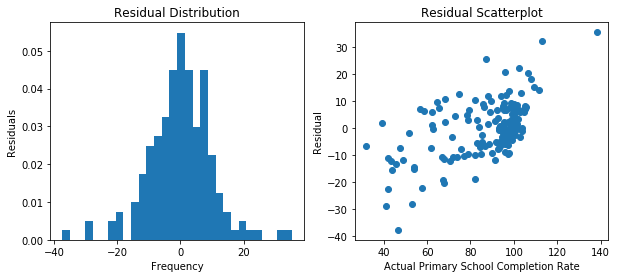

In [400]:
checkresiduals(scaled_data, 'avg_primary_school_completion', model_final)

In [395]:
data.columns

Index(['country_name', 'avg_primary_school_completion', 'avg_female_child_emp',
       'avg_male_child_emp', 'avg_gdp_on_ed', 'avg_pop_density',
       'avg_urban_pop', 'agricultural_land', 'gini_index',
       'ed_to_military_ratio', 'adolescent_birth_rate',
       'improved_sanitation_total', 'immunization_avg', 'father_support',
       'region', 'income_gp', 'high_income', 'low_income',
       'lower_middle_income', 'upper_middle_income', 'eap', 'eca', 'lac',
       'mena', 'na', 'sa', 'ssa', 'relative_country_income', 'sig_regions'],
      dtype='object')

In [404]:
features= ['avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'relative_country_income']

model_wo_interaction= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()
model_wo_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.632
Model:                                       OLS   Adj. R-squared:                  0.618
Method:                            Least Squares   F-statistic:                     45.23
Date:                           Fri, 23 Aug 2019   Prob (F-statistic):           6.59e-32
Time:                                   10:41:58   Log-Likelihood:                -630.46
No. Observations:                            165   AIC:                             1275.
Df Residuals:                                158   BIC:                             1297.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    66.0661      7.106      9.298      0.000      52.032      80.100
avg_urban_pop                -0.0239      0.055     -0.438      0.662      -0.132       0.084
agricultural_land            -0.0285      0.043     -0.666      0.506      -0.113       0.056
adolescent_birth_rate        -0.1151      0.029     -3.946      0.000      -0.173      -0.058
improved_sanitation_total     0.2877      0.058      4.934      0.000       0.173       0.403
immunization_avg              0.0883      0.068      1.292      0.198      -0.047       0.223
relative_country_income       1.9333      1.615      1.197      0.233      -1.257       5.123
==============================================================================
Omnibus:                        9.889   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               20.437
Skew:                          -0.145   Prob(JB):                     3.65e-05
Kurtosis:                       4.700   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

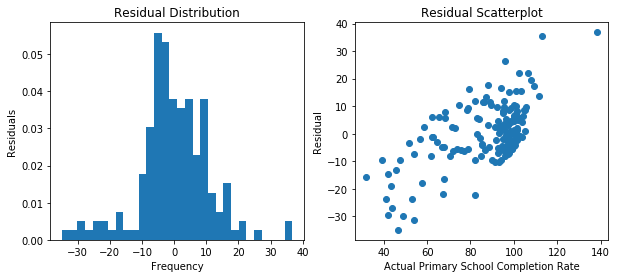

In [406]:
checkresiduals(data[features+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model_wo_interaction)

In [409]:
features= ['avg_pop_density','avg_urban_pop','agricultural_land', 'adolescent_birth_rate',
            'improved_sanitation_total','immunization_avg', 'relative_country_income', 'region']

model_bad= ols(formula="avg_primary_school_completion~"+'+'.join(features), data=data).fit()
model_bad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     avg_primary_school_completion   R-squared:                       0.693
Model:                                       OLS   Adj. R-squared:                  0.666
Method:                            Least Squares   F-statistic:                     26.16
Date:                           Fri, 23 Aug 2019   Prob (F-statistic):           2.73e-32
Time:                                   11:25:21   Log-Likelihood:                -615.64
No. Observations:                            165   AIC:                             1259.
Df Residuals:                                151   BIC:                             1303.
Df Model:                                     13                                         
Covariance Type:                       nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               69.6422      7.613      9.148      0.000      54.601      84.683
region[T.Europe & Central Asia]         -9.4332      3.182     -2.964      0.004     -15.720      -3.146
region[T.Latin America & Caribbean]     -3.5407      3.626     -0.977      0.330     -10.704       3.623
region[T.Middle East & North Africa]   -13.3548      3.663     -3.646      0.000     -20.591      -6.118
region[T.North America]                -13.8065     11.011     -1.254      0.212     -35.563       7.950
region[T.South Asia]                    -0.9034      4.667     -0.194      0.847     -10.124       8.317
region[T.Sub-Saharan Africa]           -12.2644      3.736     -3.283      0.001     -19.646      -4.883
avg_pop_density                         -0.0010      0.002     -0.632      0.528      -0.004       0.002
avg_urban_pop                            0.0462      0.057      0.809      0.420      -0.067       0.159
agricultural_land                        0.0155      0.043      0.360      0.719      -0.069       0.100
adolescent_birth_rate                   -0.1068      0.035     -3.024      0.003      -0.177      -0.037
improved_sanitation_total                0.2412      0.064      3.778      0.000       0.115       0.367
immunization_avg                         0.1127      0.070      1.616      0.108      -0.025       0.250
relative_country_income                  1.8889      1.603      1.178      0.240      -1.278       5.056
==============================================================================
Omnibus:                        8.906   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               17.459
Skew:                          -0.116   Prob(JB):                     0.000162
Kurtosis:                       4.577   Cond. No.                     8.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

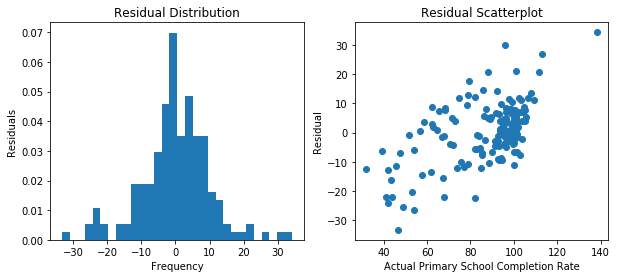

In [411]:
checkresiduals(data[features+['avg_primary_school_completion']].dropna(), 'avg_primary_school_completion', model_bad)
